In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
airbnb = pd.read_csv("AB_NYC_2019.csv")

In [22]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [23]:
airbnb.drop(['id','host_id','host_name','last_review','reviews_per_month'],axis=1,inplace=True)

In [24]:
airbnb

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
5,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129
6,BlissArtsSpace!,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,1,0
7,Large Furnished Room Near B'way,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,1,220
8,Cozy Clean Guest Room - Family Apt,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,1,0
9,Cute & Cozy Lower East Side 1 bdrm,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,4,188


In [26]:
airbnb.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [27]:
airbnb.isnull().sum()

name                              16
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [28]:
medianPrice = airbnb['price'].median() #Considering price cannot be 0, price to be replaced with median of 'price'
medianPrice

106.0

In [29]:
airbnb = airbnb.replace({'price':{0:medianPrice}})
airbnb

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,1,0
5,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74,1,129
6,BlissArtsSpace!,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45,49,1,0
7,Large Furnished Room Near B'way,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2,430,1,220
8,Cozy Clean Guest Room - Family Apt,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2,118,1,0
9,Cute & Cozy Lower East Side 1 bdrm,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1,160,4,188


In [30]:
airbnb.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.744534,7.029962,23.274466,7.143982,112.781327
std,0.054530,0.046157,240.144266,20.510550,44.550582,32.952519,131.622289
min,40.499790,-74.244420,10.000000,1.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


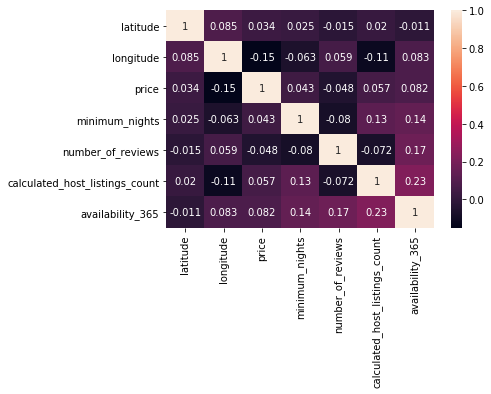

In [31]:
sns.heatmap( airbnb.corr(), annot=True) #since none of the features are correlated with each we will not be dropping any features

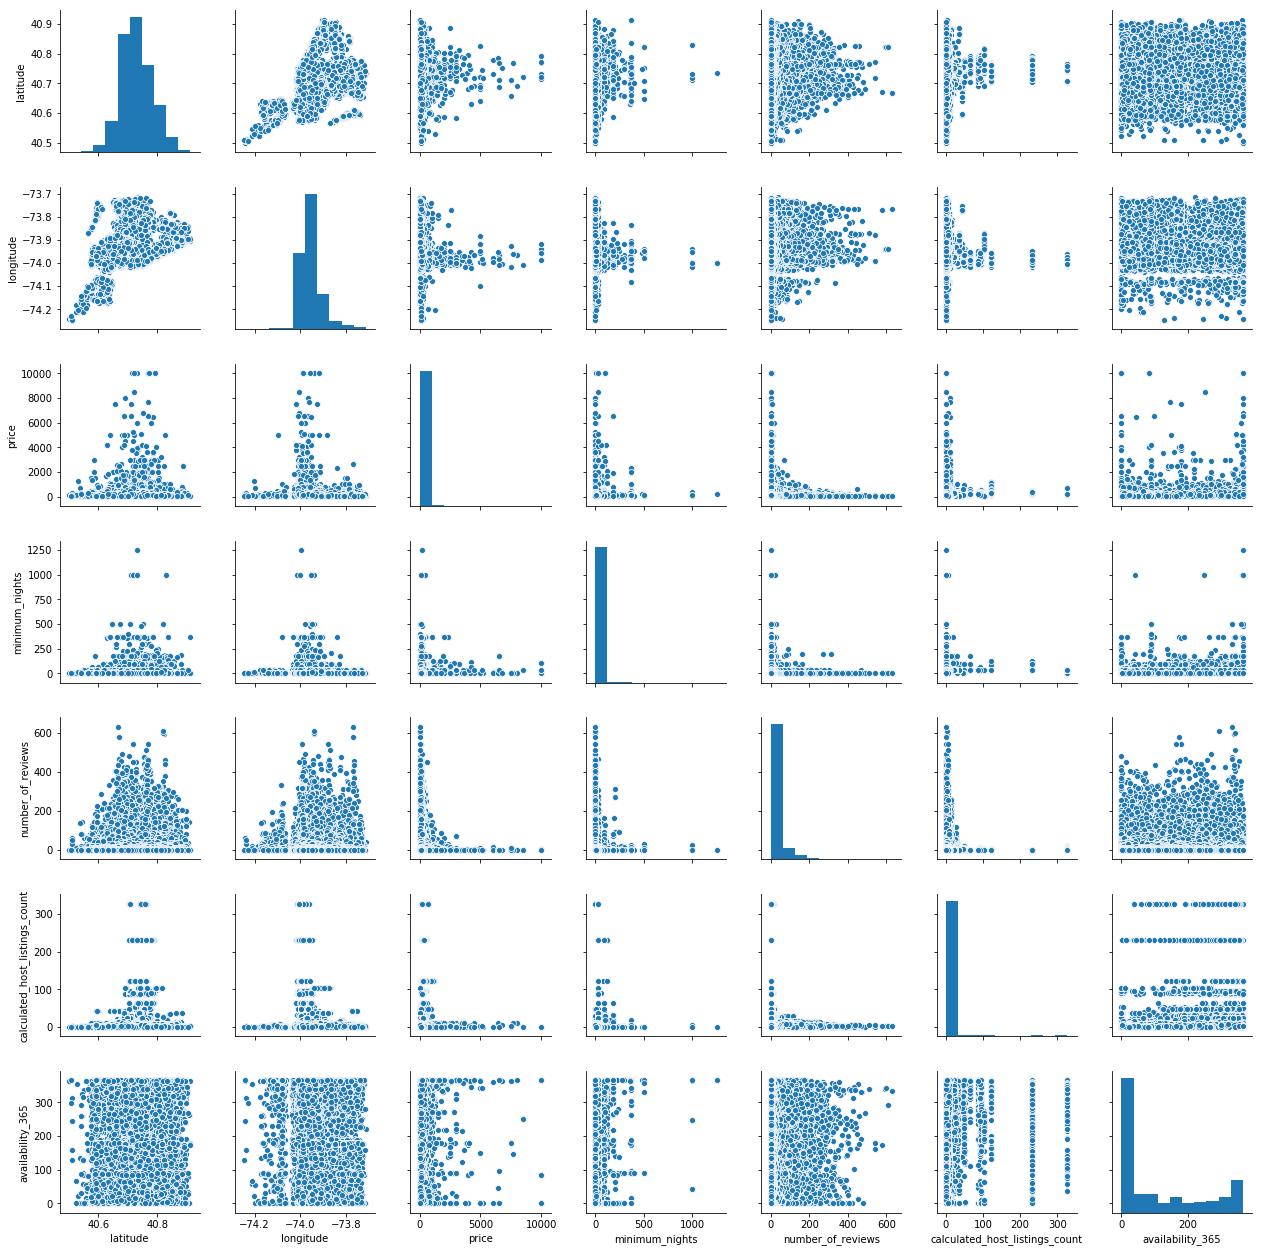

In [32]:
sns.pairplot(airbnb)
plt.show()

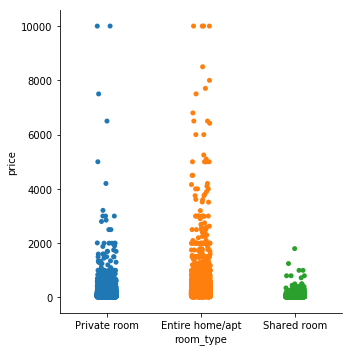

In [35]:
sns.catplot(x="room_type", y="price", data=airbnb);

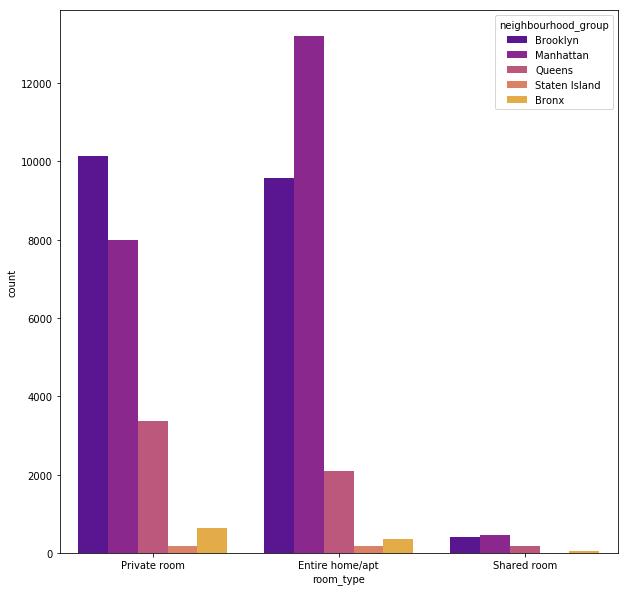

In [36]:
plt.figure(figsize=(10,10))
sns.countplot(airbnb['room_type'],hue=airbnb['neighbourhood_group'], palette='plasma')
